In [47]:
import pandas as pd   


In [48]:
data=pd.read_csv(r"C:\Users\divyansh.e.singh\Documents\MLOPS\experiment\train.csv")

In [49]:
data.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [50]:
data.drop(labels=['id'],axis=1,inplace=True)

In [51]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [52]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [53]:
cat_columns=data.columns[data.dtypes==object]

In [54]:
num_columns=data.columns[data.dtypes!=object]

In [55]:
import seaborn as sns   
import matplotlib.pyplot as plt    


<Axes: xlabel='carat', ylabel='Count'>

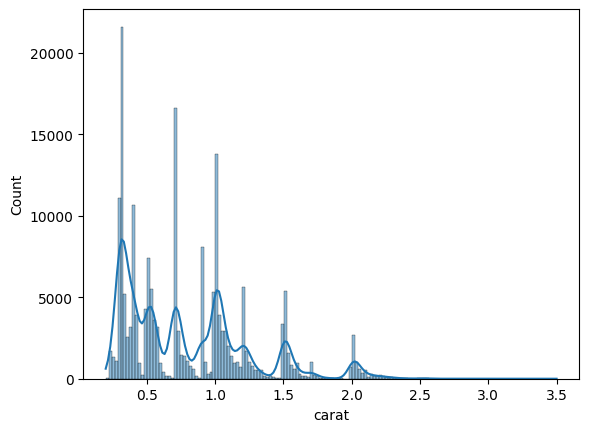

In [56]:
# plt.Figure(figsize=(8,6))
sns.histplot(x='carat',data=data,kde=True)


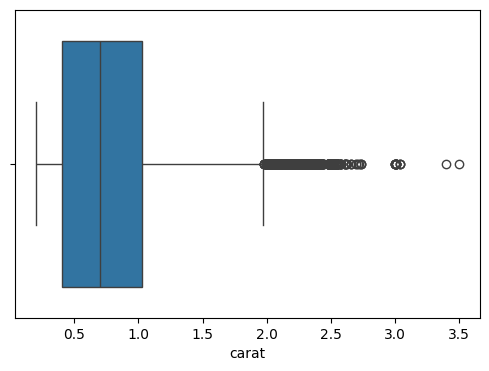

In [57]:
plt.figure(figsize=(6,4))
sns.boxplot(x='carat',data=data)
plt.show()

In [58]:
import numpy as np    


In [59]:
data['carat']=np.log(data['carat'])

<Axes: xlabel='carat', ylabel='Count'>

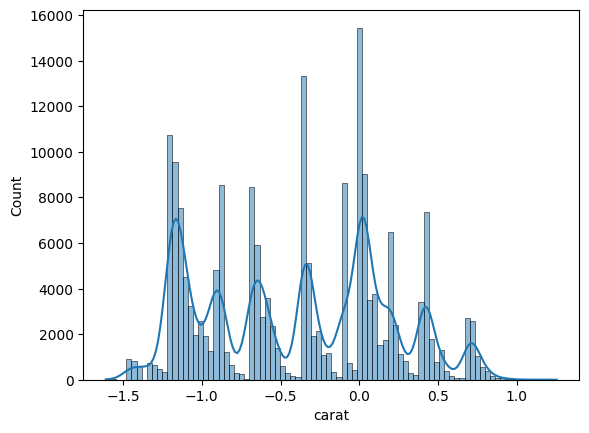

In [60]:
sns.histplot(x='carat',kde=True,data=data)

<Axes: xlabel='depth', ylabel='Count'>

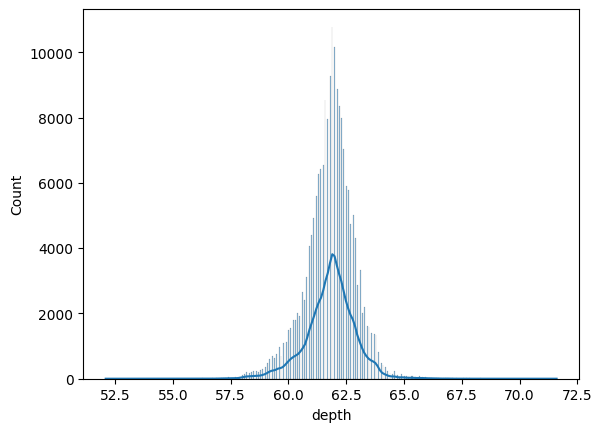

In [61]:
sns.histplot(x='depth',kde=True,data=data)

<Axes: xlabel='depth'>

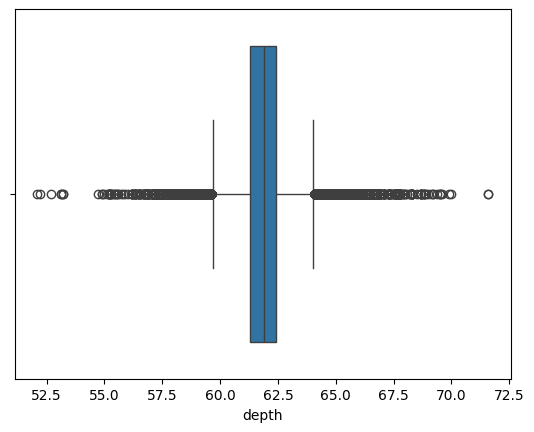

In [62]:
sns.boxplot(x='depth',data=data)

In [63]:
data['depth'].describe()

count    193573.000000
mean         61.820574
std           1.081704
min          52.100000
25%          61.300000
50%          61.900000
75%          62.400000
max          71.600000
Name: depth, dtype: float64

In [64]:
Q1=data['depth'].quantile(0.25)
Q3=data['depth'].quantile(0.75)
IQR=Q3-Q1

In [65]:
IQR

1.1000000000000014

In [66]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [67]:
lower_limit

59.64999999999999

In [68]:
upper_limit

64.05

In [69]:
data['depth']=data['depth'].clip(lower=lower_limit,upper=upper_limit)

<Axes: xlabel='depth'>

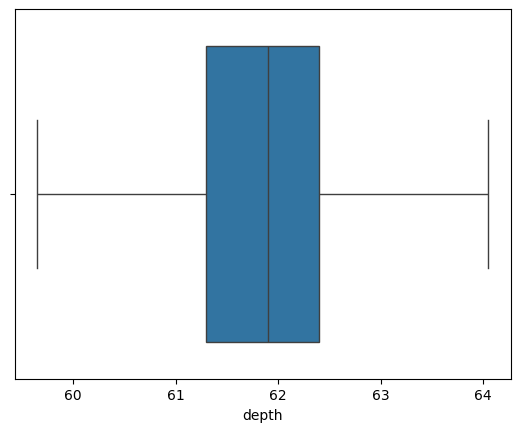

In [70]:
sns.boxplot(x='depth',data=data)

In [71]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.418710,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,0.708036,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,-0.356675,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,-1.139434,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,0.530628,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [72]:
data['table'].describe()

count    193573.000000
mean         57.227675
std           1.918844
min          49.000000
25%          56.000000
50%          57.000000
75%          58.000000
max          79.000000
Name: table, dtype: float64

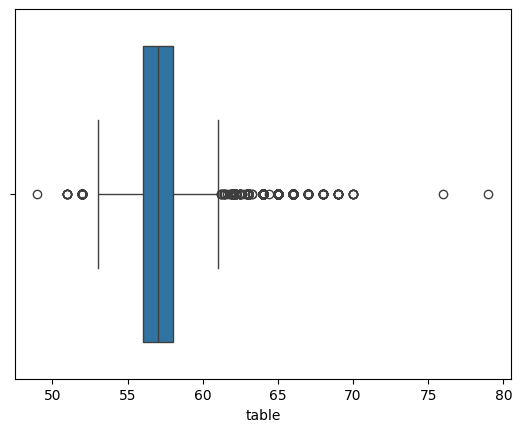

In [73]:
sns.boxplot(x='table',data=data)
plt.show()


<Axes: >

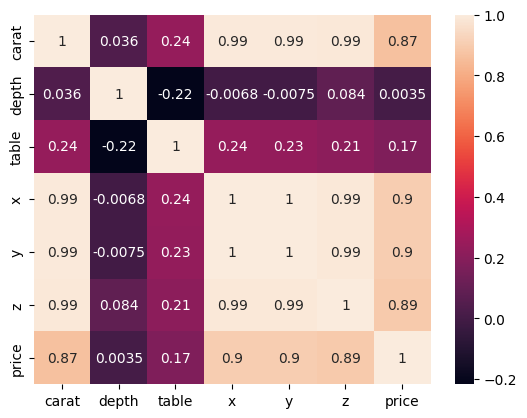

In [74]:
sns.heatmap(data[num_columns].corr(),annot=True)

In [77]:
X=data.drop(labels='price',axis=1)

In [79]:
y=data['price']

In [80]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [86]:
num_columns=num_columns.drop(labels='price')

In [87]:
num_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [88]:
cat_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [89]:
from sklearn.model_selection import train_test_split


In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
X_test

,carat,cut,color,clarity,depth,table,x,y,z
14868,-0.693147,Ideal,D,SI1,62.10,57.0,5.05,5.08,3.14
165613,0.693147,Very Good,G,SI2,59.65,57.0,8.08,8.15,4.89
96727,-1.309333,Premium,E,VVS1,60.50,59.0,4.19,4.16,2.52
145593,-1.139434,Premium,I,VVS1,61.20,59.0,4.43,4.44,2.71
118689,0.173953,Ideal,H,SI1,62.50,56.0,6.77,6.81,4.23
...,...,...,...,...,...,...,...,...,...
168548,0.009950,Good,I,SI1,63.50,59.0,6.39,6.32,4.04
167333,-1.171183,Ideal,D,VS2,61.30,55.0,4.43,4.46,2.72
113317,-0.105361,Very Good,F,SI1,62.40,63.0,6.09,6.13,3.81
25575,-0.693147,Very Good,F,SI1,62.00,60.0,5.12,5.08,3.16


In [93]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [96]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression


In [102]:
preprocessor=ColumnTransformer(transformers=[
    ('cat',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]),cat_columns)])

In [103]:
pipe=make_pipeline(

    preprocessor,
    LinearRegression()
)

In [104]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']]),
                                                  Index(['cut', 'color', 'clarity'], dtype='object'))])),
                ('linearregression', LinearRegression())])

In [105]:
y_pred=pipe.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score

In [108]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [109]:
mse

14725238.009699032

In [110]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.08876085200173478